# Task 2:  Explore Unsupervised Machine Learning(iris dataset)

**From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.**



**Download Dataset : https://bit.ly/3kXTdox**

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Load Iris data set**

In [56]:
data= pd.read_csv("Iris.csv")

In [57]:
X=data.copy()


In [58]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
X['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [60]:
X=pd.DataFrame(data)

In [61]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [62]:
X= X.drop('Species',axis=1)
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [63]:
y = data['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

**Data Preprocessing**

In [64]:
X.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Visualization**

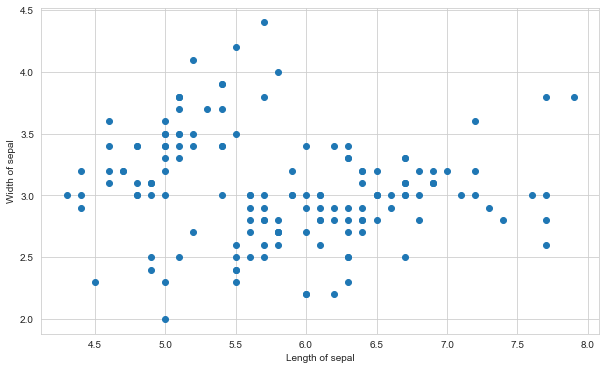

In [65]:
#Scatter plot
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.scatter(data=X,x='SepalLengthCm',y='SepalWidthCm')
plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal');

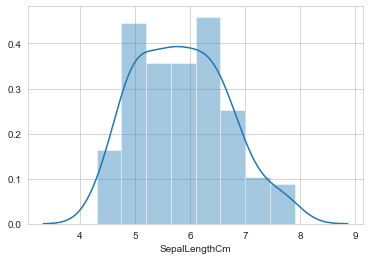

In [66]:
#Standardization of variables
sns.distplot(data['SepalLengthCm']);

In [67]:
# Scale the variables
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)
X_scaled[:10]

array([[-1.72054204, -0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.69744751, -1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.67435299, -1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.65125846, -1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.62816394, -1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-1.60506942, -0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.58197489, -1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.55888037, -1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.53578584, -1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.51269132, -1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

**Finding the optimum number of clusters for k-means classification**

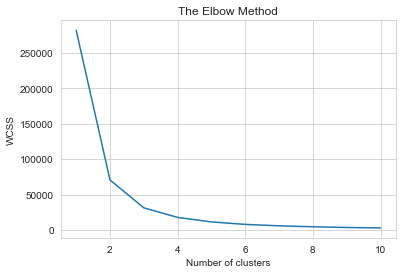

In [68]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [69]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10,random_state = 0)
y_kmeans = kmeans.fit_predict(X)

**Based on the elbow curve we can say, we can plot our graph with 2 , 3 and 5 no. of clusters .**

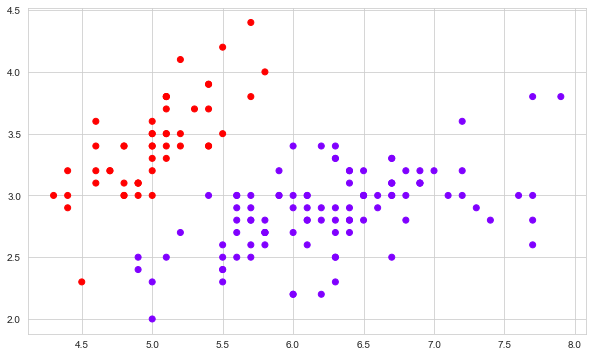

In [72]:
# 2 cluster

kmeans_2 = KMeans(2)
kmeans_2.fit(X_scaled)

cl_2 = X.copy()

cl_2['pred'] = kmeans_2.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(cl_2['SepalLengthCm'], cl_2['SepalWidthCm'], c= cl_2['pred'], cmap = 'rainbow');

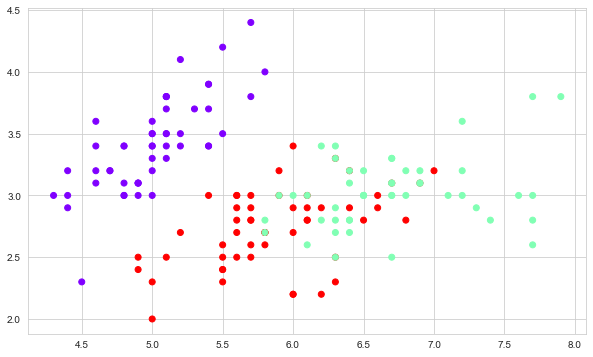

In [73]:

# 3 cluster

kmeans_3 = KMeans(3)
kmeans_3.fit(X_scaled)

cl_3 = X.copy()

cl_3['pred'] = kmeans_3.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(cl_3['SepalLengthCm'], cl_3['SepalWidthCm'], c= cl_3['pred'], cmap = 'rainbow');

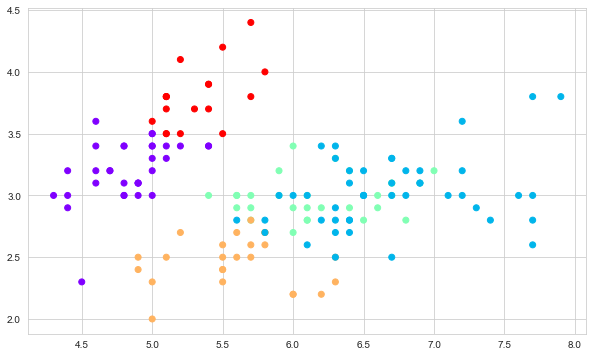

In [74]:
#5 cluster

kmeans_5 = KMeans(5)
kmeans_5.fit(X_scaled)

cl_5 = X.copy()

cl_5['pred'] = kmeans_5.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(cl_5['SepalLengthCm'], cl_5['SepalWidthCm'], c= cl_5['pred'], cmap = 'rainbow');

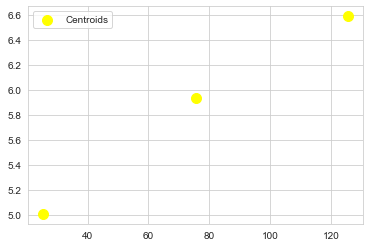

In [79]:
# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

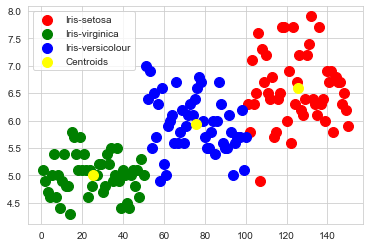

In [81]:


plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

